# Exploratory Data Analysis

## Topic Analysis

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
# Load preprocessed text
import pickle

infile = open('processed_text.pkl','rb')
text_l = pickle.load(infile)
infile.close()

In [8]:
# Load document-topic matrix
infile = open('doc_topic.pkl','rb')
doc_topic = pickle.load(infile)
infile.close()

In [9]:
# Topics
topic_names = {0: 'clinical recommendations',
              1: 'pathophysiology',
              2: 'prognosis',
              3: 'children',
              4: 'cancer',
              5: 'mental health',
              6: 'diagnosis/serology',
              7: 'resources & technology',
              8: 'vaccine',
              9: 'predictions/forecasting',
              10: 'transmission',
              11: 'global impact',
              12: 'pregnancy',
              13: 'surgery',
              14: 'treatment',
              15: 'microbiology',
              16: 'education',
              17: 'clinical features',
              18: 'deaths',
              19: 'healthcare workers & PPE'}

topic_labels = list(topic_names.values())

In [10]:
# Load PMIDs to use as abstract labels
infile = open('pmids.pkl','rb')
pmids = pickle.load(infile)
infile.close()

In [11]:
# Assign topic to each document
doc_best_topic = doc_topic.argmax(axis=1)
classified_docs_df = pd.DataFrame(doc_best_topic, index=pmids).reset_index()
classified_docs_df.rename(columns={0: 'topic', 'index': 'pmid'}, inplace=True)
classified_docs_df['topic'] = classified_docs_df['topic'].map(topic_names)
classified_docs_df.head()

,pmid,topic
0,33152797,pregnancy
1,33152773,resources & technology
2,33152771,surgery
3,33152743,children
4,33152729,healthcare workers & PPE


In [12]:
# Get max score for each document
max_score = doc_topic.max(axis=1)
doc_score_df = pd.DataFrame(max_score, pmids).reset_index()
doc_score_df.rename(columns={0: 'score', 'index': 'pmid2'}, inplace=True)
doc_score_df.head()

,pmid2,score
0,33152797,0.067433
1,33152773,0.010049
2,33152771,0.040773
3,33152743,0.057558
4,33152729,0.111834


In [13]:
# Merge dataframes
docs_topic_score_df = pd.concat([classified_docs_df, doc_score_df], axis=1)
docs_topic_score_df.drop(columns='pmid2', inplace=True)
docs_topic_score_df.head()

,pmid,topic,score
0,33152797,pregnancy,0.067433
1,33152773,resources & technology,0.010049
2,33152771,surgery,0.040773
3,33152743,children,0.057558
4,33152729,healthcare workers & PPE,0.111834


In [14]:
# Look at average score per topic
docs_topic_score_df.groupby('topic').mean()

,score
topic,
cancer,0.086569
children,0.090088
clinical features,0.037732
clinical recommendations,0.023771
deaths,0.066171
diagnosis/serology,0.058146
education,0.078915
global impact,0.052460
healthcare workers & PPE,0.053450


In [15]:
# Number of abstracts for each topic
topic, docs = np.unique(doc_topic.argmax(axis=1), return_counts=True)
topic_freq = pd.DataFrame({'topic': topic, 'num_abstracts': docs})
topic_freq['topic'] = topic_freq['topic'].map(topic_names)
topic_freq = topic_freq.sort_values(by='num_abstracts')
topic_freq.set_index('topic', inplace=True)

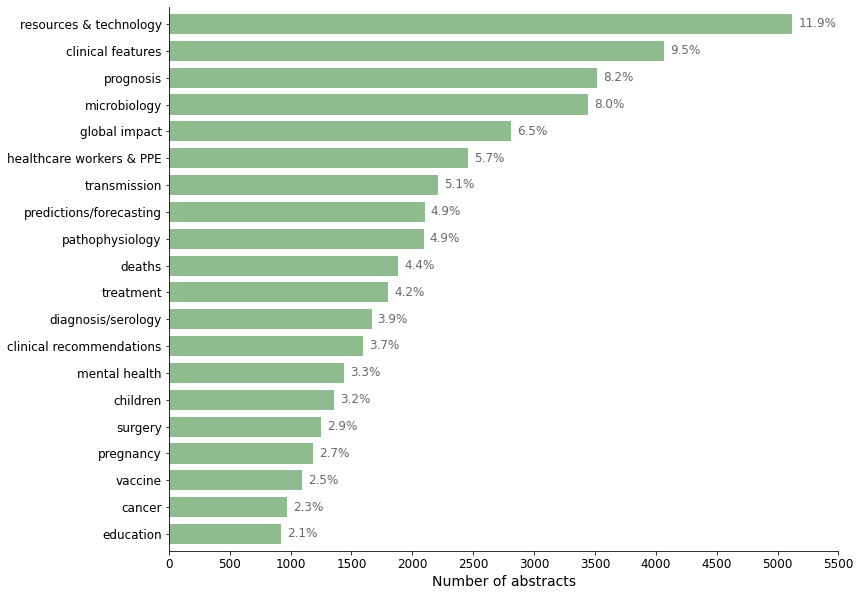

In [843]:
# Plot (code adapted from: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)
ax = topic_freq.plot(kind='barh', color='darkseagreen', figsize=(12,10), legend=None, width=0.75)
ax.set_alpha(0.8)
ax.set_xlabel("Number of abstracts", fontsize=14);
ax.set_xticks(np.arange(0,6000,500))
ax.set_ylabel("", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+50, i.get_y()+.25, \
            str(round((i.get_width()/total)*100, 1))+'%', fontsize=12, color='dimgrey')

plt.savefig('topics_num_abstracts.svg', dpi=100, bbox_inches='tight');

Observations:
- The 'resources & technology' topic is significantly more prolific than the others
- The distribution of these topics makes sense in light of which COVID-related topics are most relevant to a wider audience and engage people's interest.
- The topics that are less prolific seem to be related to specialized patient groups/areas of medical care
- The underlying mechanisms of the SARS-CoV-2 virus and COVID-19 disease are highly studied

In [16]:
# Load original dataframe
df = pd.read_csv('/Users/sunnajo/Desktop/abstracts_df_cleaned.csv')
df.shape

(42977, 17)

In [17]:
df.columns

Index(['pmid', 'title', 'authors', 'source', 'location', 'pub_date',
       'entrez_date', 'country', 'language', 'abstract', 'entrez_date_dt',
       'year', 'month', 'pub_date_dt', 'pub_month', 'pub_country', 'state'],
      dtype='object')

In [18]:
# Drop unneeded columns
df = df[['pmid', 'abstract', 'pub_month', 'pub_country', 'state']]
df.rename(columns={'pub_country': 'country', 'pub_month': 'month'}, inplace=True)
df.head(1)

,pmid,abstract,month,country,state
0,33152797,SARS-CoV-2 (COVID-19) infection in pregnancy i...,11,Mexico,NaN


In [19]:
# Rename columns for merging
docs_topic_score_df.rename(columns={'pmid': 'pmid2'}, inplace=True)
docs_topic_score_df.head(1)

,pmid2,topic,score
0,33152797,pregnancy,0.067433


In [20]:
# Merge dataframes
merged_df = pd.concat([df, docs_topic_score_df], axis=1)
merged_df.drop(columns='pmid2', inplace=True)
merged_df.rename(columns={'pub_country': 'country'}, inplace=True)
merged_df.head()

,pmid,abstract,month,country,state,topic,score
0,33152797,SARS-CoV-2 (COVID-19) infection in pregnancy i...,11,Mexico,NaN,pregnancy,0.067433
1,33152773,After loosening of travel restrictions due to ...,11,Germany,NaN,resources & technology,0.010049
2,33152771,The corona virus has spread worldwide since it...,11,Germany,NaN,surgery,0.040773
3,33152743,The childhood obesity pandemic has emerged as ...,11,Germany,NaN,children,0.057558
4,33152729,BACKGROUND: As the fight against the COVID-19 ...,11,China,NaN,healthcare workers & PPE,0.111834


I want to look at how topics changed over time. I will look at change over years and then change over time within 2020 since an overwhleming majority of the studies were published in 2020.

In [21]:
# For each month, look at distribution of topics
month_topic_df = pd.DataFrame(merged_df.groupby(['month', 'topic']).size())
month_topic_df.rename(columns={0: 'num_abstracts'}, inplace=True)
month_topic_df

num_abstracts
month topic                                  
1     children                              4
      clinical features                     3
      diagnosis/serology                    4
      global impact                         1
      healthcare workers & PPE              1
...                                       ...
12    resources & technology              105
      surgery                              16
      transmission                         29
      treatment                            28
      vaccine                              19

[232 rows x 1 columns]

In [22]:
# For each topic, look at change over time
topic_month_df = pd.DataFrame(merged_df.groupby(['topic', 'month']).size())
topic_month_df.rename(columns={0: 'num_abstracts'}, inplace=True)
topic_month_df

num_abstracts
topic   month               
cancer  2                  4
        3                 10
        4                 35
        5                 60
        6                131
...                      ...
vaccine 8                175
        9                200
        10               220
        11                46
        12                19

[232 rows x 1 columns]

In [23]:
# Dataframe without Nov & Dec
merged_df_oct = merged_df[merged_df['month'] < 11]
merged_df_oct['month'].value_counts()

10    8276
9     7773
8     6791
7     6364
6     5002
5     3057
4     1646
3      623
2      302
1       31
Name: month, dtype: int64

Excluding Nov & Dec:

In [24]:
topic_month_df_oct = pd.DataFrame(merged_df_oct.groupby(['topic', 'month']).size())
topic_month_df_oct.rename(columns={0: 'num_abstracts'}, inplace=True)
topic_month_df_oct.head()

num_abstracts
topic  month               
cancer 2                  4
       3                 10
       4                 35
       5                 60
       6                131

In [25]:
month_topic_df_oct = pd.DataFrame(merged_df_oct.groupby(['month', 'topic']).size())
month_topic_df_oct.rename(columns={0: 'num_abstracts'}, inplace=True)
month_topic_df_oct.head()

num_abstracts
month topic                                  
1     children                              4
      clinical features                     3
      diagnosis/serology                    4
      global impact                         1
      healthcare workers & PPE              1

In [616]:
# Plot frequency of topics over time for each topic
def plot_topic_over_time(df, topic_labels):
    for i in range(len(topic_labels)):
        data = df.xs(topic_names[i])
        ax = data.plot(kind='line', title='Topic: {}'.format(topic_names[i]), legend=None, linewidth=2)
        
        ax.set_xlabel('Month', fontsize=13)
        ax.set_ylabel('Number of abstracts', fontsize=13)
        ax.set_xticks(np.arange(1,11))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False);

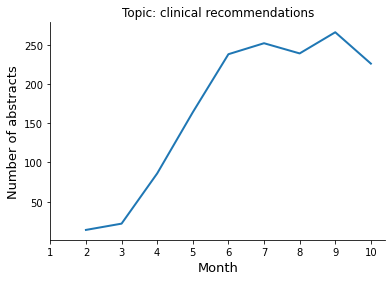

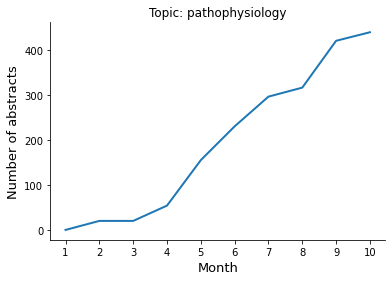

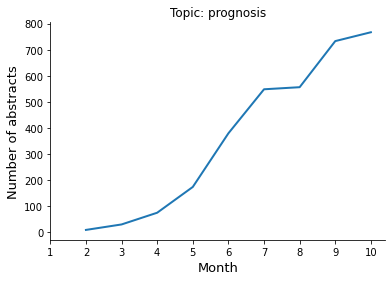

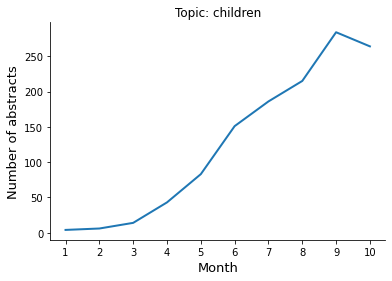

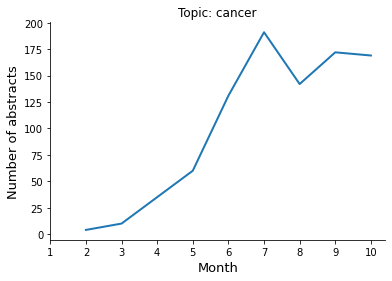

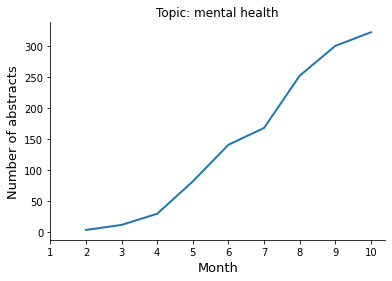

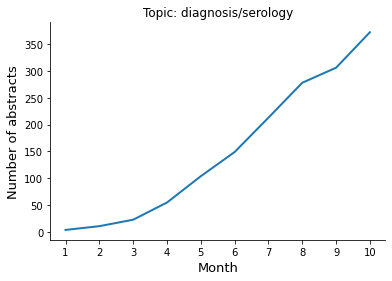

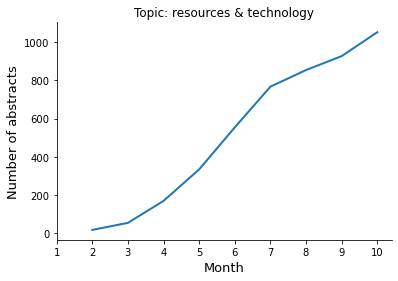

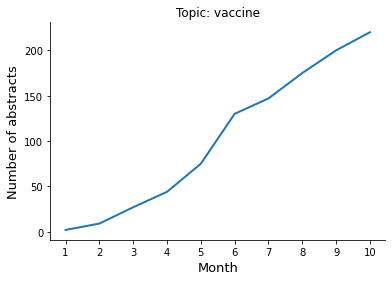

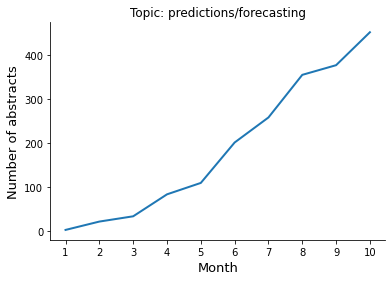

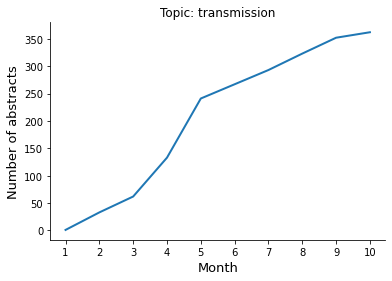

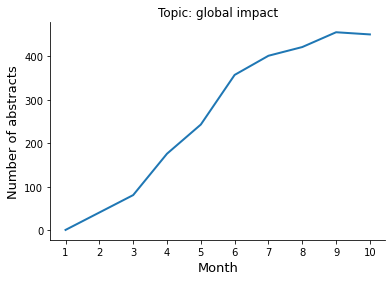

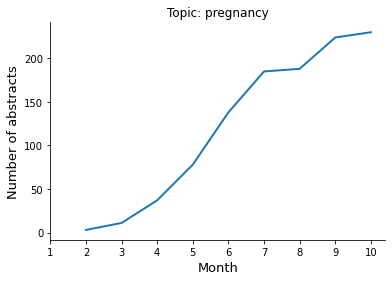

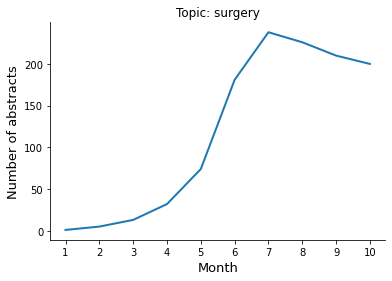

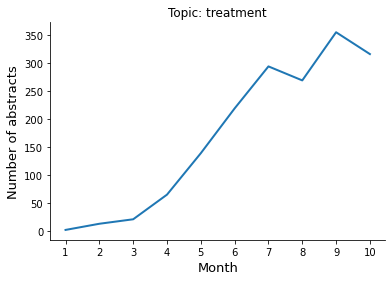

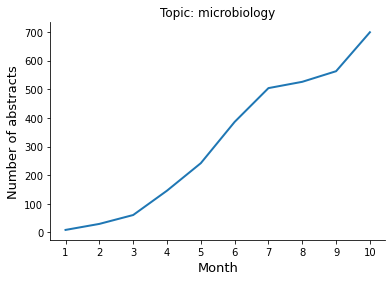

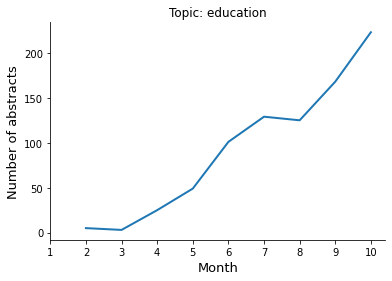

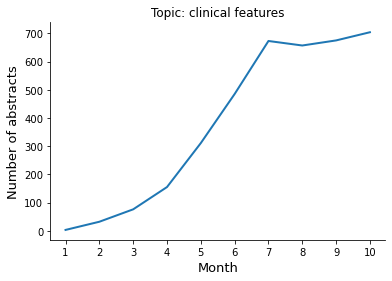

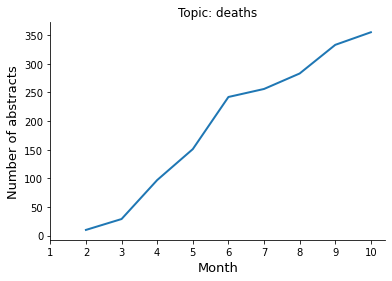

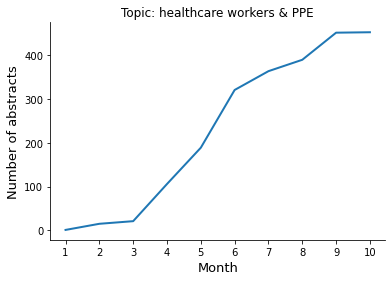

In [714]:
plot_topic_over_time(topic_month_df_oct, topic_labels)

Notes:
- I excluded Nov & Dec as these months are not yet complete

Observations:
- Published works across all topics have generally increased since the beginning of the year with fairly steep increases from March through Aug/Sept
- Topics that have been decreasing over the last few months: 'surgery', 'clincal features', 'treatment', 'children', 'clinical recommendations'
- Frequencies of published abstracts/studies have decreased for the 'surgery' topic, which corresponds with what is happening in real time. Elective surgeries were postponed at the height of the pandemic but have now resumed so it makes sense that exploration in this area would drop off.
- The increase in frequency is particularly steep for the topics of immunology, mental health, education
- We see a significant increase in the number of abstracts published from Sept to Oct for the 'clinical trials' topic, which makes sense given that clinical trials take some time to conduct
- All of these topics are continuing to be areas of interest (studies are being published in Nov & Dec)

In [26]:
# Indices for above dataframe
tm_idx = sorted(list(set([i[0] for i in topic_month_df_oct.index])))
mt_idx = sorted(list(set([i[0] for i in month_topic_df_oct.index])))

In [30]:
# Unstack dataframe
topic_month_df_oct2 = topic_month_df_oct.unstack(level=0)
topic_month_df_oct2.fillna(0, inplace=True)
topic_month_df_oct2.columns = topic_month_df_oct2.columns.droplevel(0)
topic_month_df_oct2

topic,cancer,children,clinical features,clinical recommendations,deaths,diagnosis/serology,education,global impact,healthcare workers & PPE,mental health,microbiology,pathophysiology,predictions/forecasting,pregnancy,prognosis,resources & technology,surgery,transmission,treatment,vaccine
month,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,3.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,9.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
2,4.0,6.0,32.0,14.0,10.0,11.0,5.0,41.0,15.0,4.0,30.0,21.0,21.0,3.0,8.0,17.0,5.0,33.0,13.0,9.0
3,10.0,14.0,76.0,22.0,29.0,23.0,3.0,81.0,21.0,12.0,61.0,21.0,33.0,11.0,29.0,54.0,13.0,62.0,21.0,27.0
4,35.0,43.0,155.0,86.0,97.0,55.0,25.0,176.0,106.0,30.0,146.0,55.0,83.0,37.0,74.0,169.0,32.0,133.0,65.0,44.0
5,60.0,83.0,311.0,164.0,151.0,104.0,49.0,243.0,189.0,82.0,242.0,156.0,109.0,78.0,173.0,334.0,74.0,241.0,139.0,75.0
6,131.0,151.0,485.0,238.0,242.0,149.0,101.0,357.0,321.0,141.0,386.0,231.0,201.0,138.0,379.0,554.0,181.0,267.0,219.0,130.0
7,191.0,186.0,673.0,252.0,256.0,213.0,129.0,401.0,364.0,168.0,504.0,297.0,258.0,185.0,548.0,767.0,238.0,293.0,294.0,147.0
8,142.0,215.0,657.0,239.0,283.0,278.0,125.0,421.0,390.0,252.0,526.0,317.0,355.0,188.0,556.0,854.0,226.0,323.0,269.0,175.0
9,172.0,284.0,675.0,266.0,333.0,306.0,168.0,455.0,452.0,300.0,563.0,421.0,377.0,224.0,733.0,927.0,210.0,352.0,355.0,200.0


In [31]:
topic_month_df_oct2.columns

Index(['cancer', 'children', 'clinical features', 'clinical recommendations',
       'deaths', 'diagnosis/serology', 'education', 'global impact',
       'healthcare workers & PPE', 'mental health', 'microbiology',
       'pathophysiology', 'predictions/forecasting', 'pregnancy', 'prognosis',
       'resources & technology', 'surgery', 'transmission', 'treatment',
       'vaccine'],
      dtype='object', name='topic')

In [98]:
# Colors for plotting
tab_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
              'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

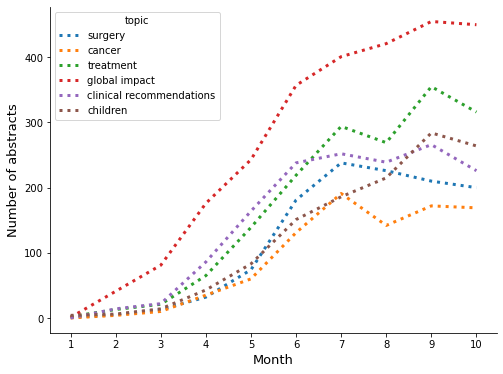

In [111]:
# Plot select trends for topics over time
ax = topic_month_df_oct2.loc[:,['surgery', 'cancer', 'treatment', 'global impact',
                                'clinical recommendations', 'children']].\
plot(kind='line', linestyle=':', linewidth=3, figsize=(8,6))
ax.set_xlabel('Month', fontsize=13)
ax.set_xticks(np.arange(1,11))
ax.set_ylabel('Number of abstracts', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_children()[0].set_color(tab_colors[0])
ax.get_children()[1].set_color(tab_colors[1])
ax.get_children()[2].set_color(tab_colors[2])
ax.get_children()[3].set_color(tab_colors[3])
ax.get_children()[4].set_color(tab_colors[4]);

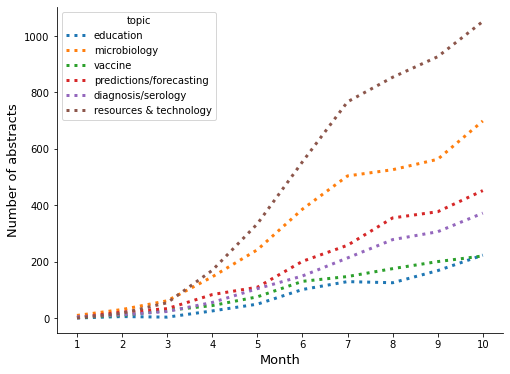

In [107]:
ax = topic_month_df_oct2.loc[:,['education', 'microbiology', 'vaccine', 'predictions/forecasting',
                                'diagnosis/serology', 'resources & technology']].\
plot(kind='line', linestyle=':', linewidth=3, figsize=(8,6))
ax.set_xlabel('Month', fontsize=13)
ax.set_xticks(np.arange(1,11))
ax.set_ylabel('Number of abstracts', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

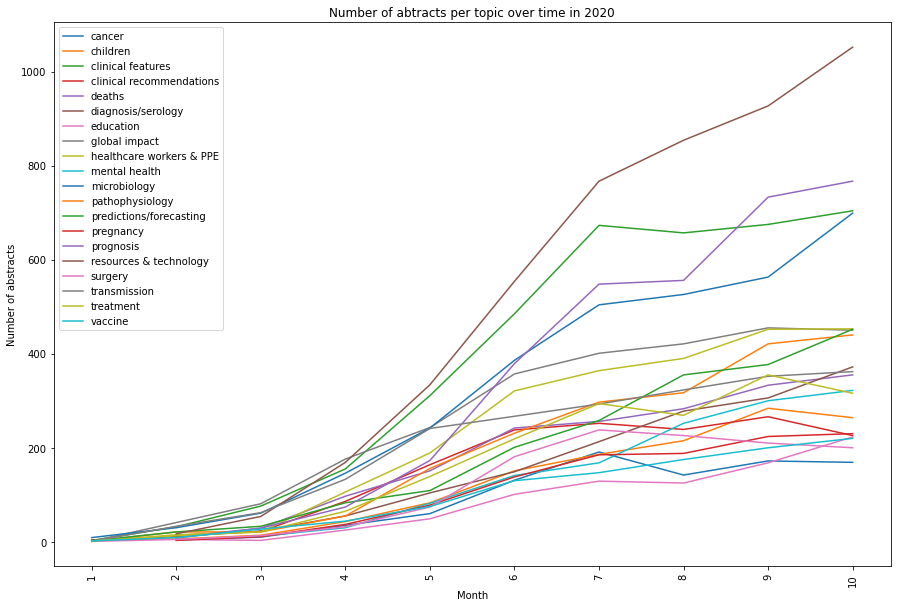

In [112]:
# For each topic, look at change in frequency over time
topic_month_df_oct.unstack(level=0).plot(kind='line', figsize=(15,10))
plt.title('Number of abtracts per topic over time in 2020')
plt.xlabel('Month')
plt.ylabel('Number of abstracts')
plt.xticks(range(1,11), rotation=90);
plt.legend(labels=tm_idx, loc='best');

In [131]:
# Unstack dataframe
unstacked_tm_df = topic_month_df.unstack(level=0)
unstacked_tm_df.iloc[1:]

num_abstracts                                                      \
topic        cancer children clinical features clinical recommendations   
month                                                                     
2               4.0      6.0              32.0                     14.0   
3              10.0     14.0              76.0                     22.0   
4              35.0     43.0             155.0                     86.0   
5              60.0     83.0             311.0                    164.0   
6             131.0    151.0             485.0                    238.0   
7             191.0    186.0             673.0                    252.0   
8             142.0    215.0             657.0                    239.0   
9             172.0    284.0             675.0                    266.0   
10            169.0    264.0             704.0                    226.0   
11             54.0     81.0             246.0                     74.0   
12              6.0     23.0              52.0                     13.0   

                                                         \
topic deaths diagnosis/serology education global impact   
month                                                     
2       10.0               11.0       5.0          41.0   
3       29.0               23.0       3.0          81.0   
4       97.0               55.0      25.0         176.0   
5      151.0              104.0      49.0         243.0   
6      242.0              149.0     101.0         357.0   
7      256.0              213.0     129.0         401.0   
8      283.0              278.0     125.0         421.0   
9      333.0              306.0     168.0         455.0   
10     355.0              372.0     223.0         450.0   
11     109.0               93.0      58.0         119.0   
12      21.0               57.0      34.0          68.0   

                                                                           \
topic healthcare workers & PPE mental health microbiology pathophysiology   
month                                                                       
2                         15.0           4.0         30.0            21.0   
3                         21.0          12.0         61.0            21.0   
4                        106.0          30.0        146.0            55.0   
5                        189.0          82.0        242.0           156.0   
6                        321.0         141.0        386.0           231.0   
7                        364.0         168.0        504.0           297.0   
8                        390.0         252.0        526.0           317.0   
9                        452.0         300.0        563.0           421.0   
10                       453.0         322.0        699.0           440.0   
11                       120.0          90.0        201.0            98.0   
12                        23.0          36.0         74.0            36.0   

                                                                          \
topic predictions/forecasting pregnancy prognosis resources & technology   
month                                                                      
2                        21.0       3.0       8.0                   17.0   
3                        33.0      11.0      29.0                   54.0   
4                        83.0      37.0      74.0                  169.0   
5                       109.0      78.0     173.0                  334.0   
6                       201.0     138.0     379.0                  554.0   
7                       258.0     185.0     548.0                  767.0   
8                       355.0     188.0     556.0                  854.0   
9                       377.0     224.0     733.0                  927.0   
10                      452.0     230.0     767.0                 1052.0   
11                      150.0      74.0     213.0                  287.0   
12                       60.0      13.0      35.0            

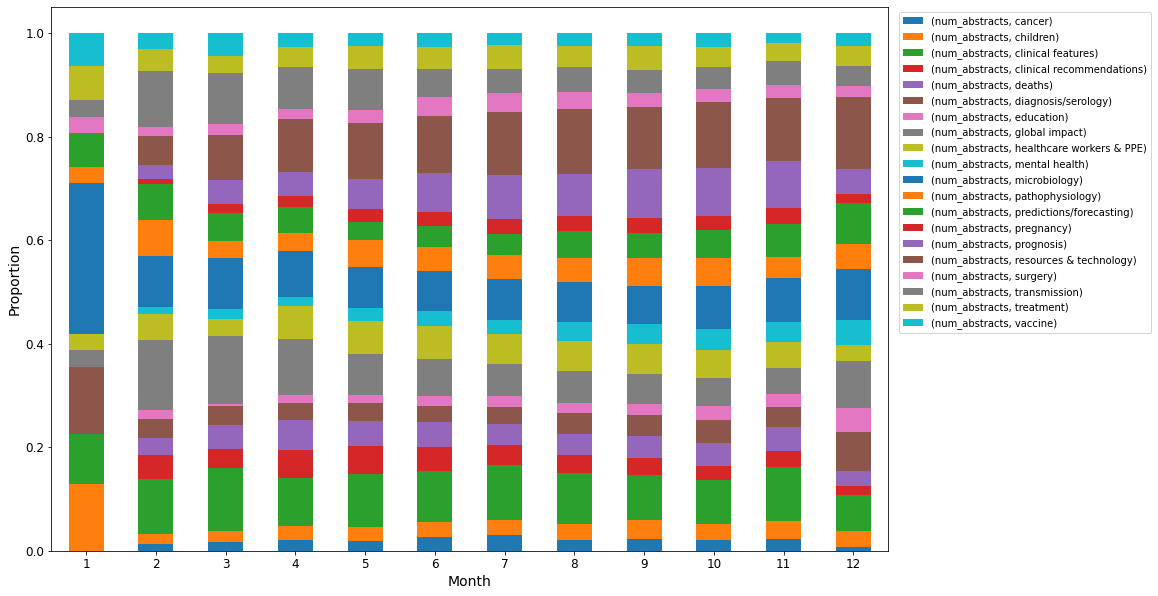

In [146]:
# Focus increasing over time
ax = unstacked_tm_df.div(unstacked_tm_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(15,10), legend=None)

plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Proportion', fontsize=14);
plt.legend(bbox_to_anchor=(1.32,1), loc="upper right");

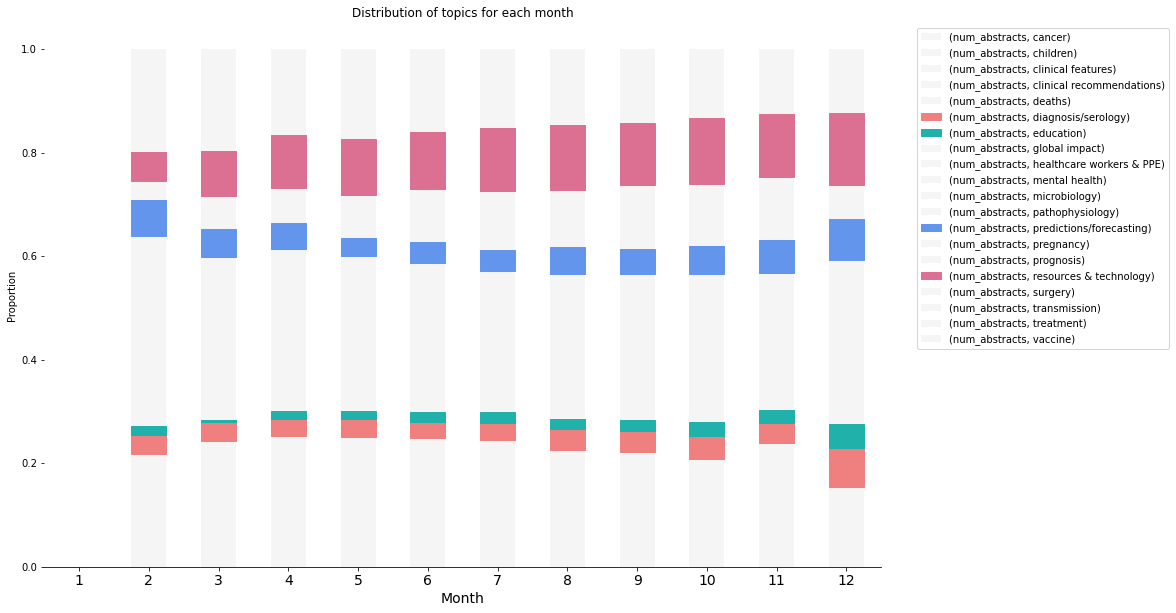

In [160]:
# Plot proportions: look at areas of increasing focus
ax = unstacked_tm_df.iloc[1:].div(unstacked_tm_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(15,10),
                                                                           color='whitesmoke')

# Diagnosis/serology
for i in range(60,72):
    ax.patches[i].set_color('lightcoral')
    
# Education
for i in range(72,84):
    ax.patches[i].set_color('lightseagreen')
    
# Predictions/forecasting
for i in range(144,156):
    ax.patches[i].set_color('cornflowerblue')
    
# Resources & technology
for i in range(180,192):
    ax.patches[i].set_color('palevioletred')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Distribution of topics for each month')
plt.xlabel('Month', fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.35,1), loc="upper right")
plt.savefig('topics_distribution.svg', bbox_inches='tight', dpi=100);

Observations:
- Earlier, on, there was a focus on pathophysiology, predictions/forecasting, diagnosis/serology, microbiology
- Focus on global impact, transmission, healthcare workers/PPE, deaths have been decreasing
- It looks like emphasis may be shifting to resources/technology, diagnosis/serology, predictions/forecasting
- Interest in clinical features, microbiology, treatment, vaccine has remained steady

The WHO declared the COVID-19 pandemic on March 11, 2020. Let's look at the studies published in January-March and compare them to those published afterwards.

In [747]:
# Number of topics by month
month_num_topics = {}
for i in range(1,13):
    try:
        month_num_topics[i] = len(month_topic_df.xs(i).index)
    except:
        month_num_topics[i] = 0

month_num_topics

{1: 12,
 2: 20,
 3: 20,
 4: 20,
 5: 20,
 6: 20,
 7: 20,
 8: 20,
 9: 20,
 10: 20,
 11: 20,
 12: 20}

It looks like the topics cover almost all of the months, except January. Let's look at what topics are present/missing in January.

In [748]:
# Topics in January
month_topic_df.xs(1).index

Index(['children', 'clinical features', 'diagnosis/serology', 'global impact',
       'healthcare workers & PPE', 'microbiology', 'pathophysiology',
       'predictions/forecasting', 'surgery', 'transmission', 'treatment',
       'vaccine'],
      dtype='object', name='topic')

It looks like January is missing the following topics: clinical recommendations, prognosis, cancer, mental health, resources & technology, pregnancy, education, deaths. This makes sense given that abstracts related to these topics would have been published after the onset and likely at the height of the pandemic when the effect of the pandemic on these domains became clearer.

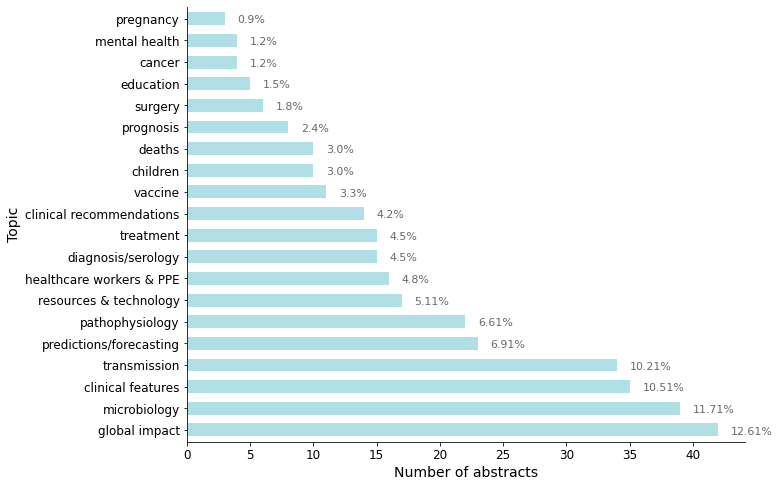

In [753]:
# Topics for Jan-Feb
ax = merged_df[merged_df['month'] < 3]['topic'].value_counts().plot(kind='barh', figsize=(10,8), color='powderblue', width=0.6)
ax.set_alpha(0.8)
ax.set_xlabel("Number of abstracts", fontsize=14);
# ax.set_xticks(np.arange(0,6000,500))
ax.set_ylabel("Topic", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.1, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='dimgrey')

# for i in range(4,20):
#     ax.patches[i].set_alpha(0.2)

# plt.savefig('topics_janmar.svg', dpi=100, bbox_inches='tight');

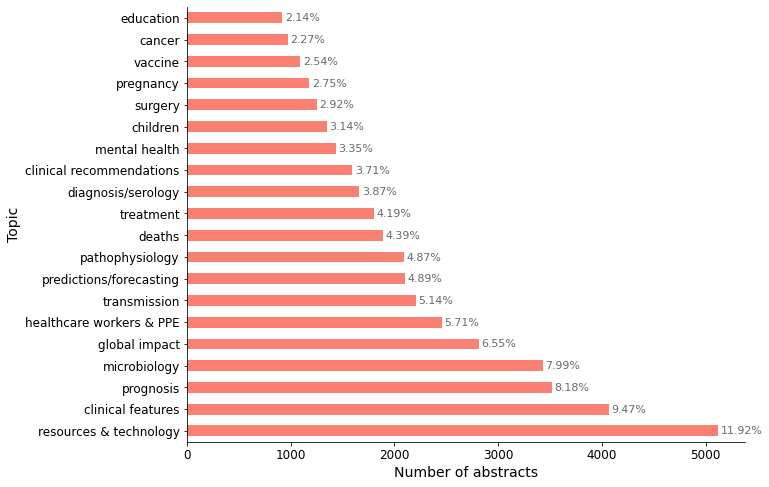

In [755]:
# Topics for after Jan
ax = merged_df[merged_df['month'] > 1]['topic'].value_counts().plot(kind='barh', figsize=(10,8), color='salmon')
ax.set_alpha(0.8)
ax.set_xlabel("Number of abstracts", fontsize=14);
# ax.set_xticks(np.arange(0,6000,500))
ax.set_ylabel("Topic", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+25, i.get_y()+.1, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='dimgrey')

# ax.patches[1].set_color('powderblue')
# ax.patches[3].set_color('powderblue')
# ax.patches[5].set_color('powderblue')
# ax.patches[6].set_color('powderblue')

plt.savefig('topics_after_jan.svg', dpi=100, bbox_inches='tight');

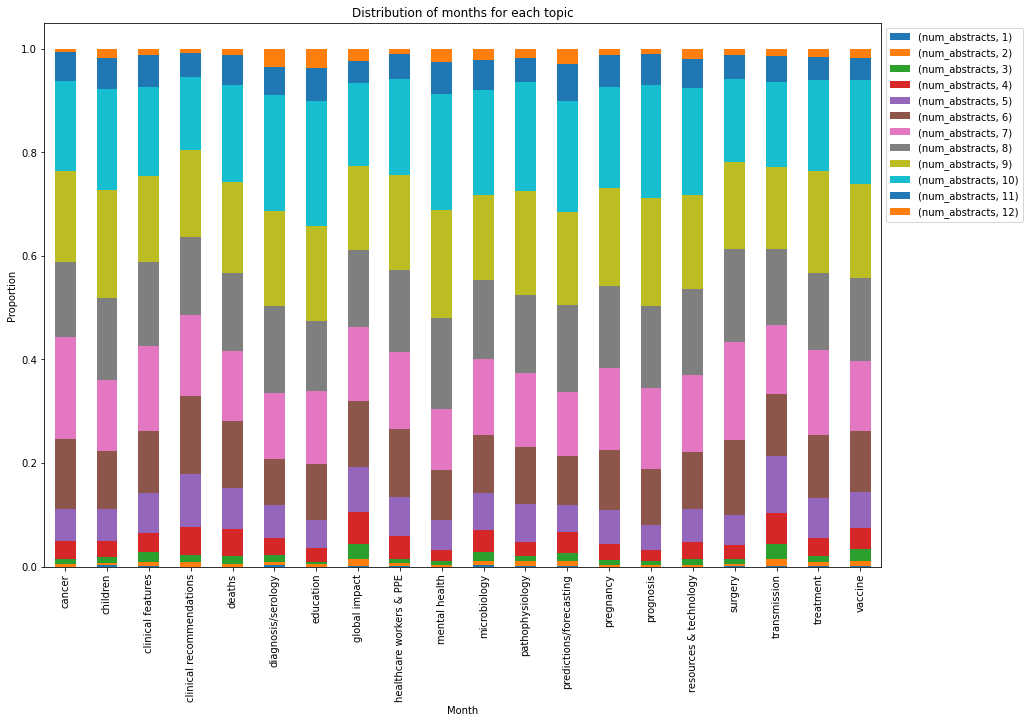

In [761]:
# For each topic, look at distribution by month
unstacked_mt_df = month_topic_df.unstack(level=0)
unstacked_mt_df.div(unstacked_mt_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Distribution of months for each topic')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.175,1), loc="upper right");

It looks the distribution of the months is fairly similar for all of the topics.

### Topic by location

In [164]:
topic_pubcountry_df = pd.DataFrame(merged_df.groupby(['topic', 'country']).size())
topic_pubcountry_df.rename(columns={0: 'num_abstracts'}, inplace=True)
topic_pubcountry_df

num_abstracts
topic   country                            
cancer  Argentina                         4
        Australia                        13
        Austria                           3
        Bangladesh                        1
        Belgium                           5
...                                     ...
vaccine Turkey                            8
        United Arab Emirates              2
        United Kingdom                   62
        United States                   341
        Vietnam                           1

[1674 rows x 1 columns]

In [32]:
# For each topic, look at distribution of countries (top 10)
def plot_topic_countries(df, i):
    data = df.xs(topic_names[i]).sort_values(by='num_abstracts', ascending=False).iloc[:10,:]
    data.plot(kind='bar', figsize=(8,5), legend=None, title='Topic: {}'.format(topic_names[i]))
    plt.xlabel('Country')
    plt.ylabel('Number of abstracts');

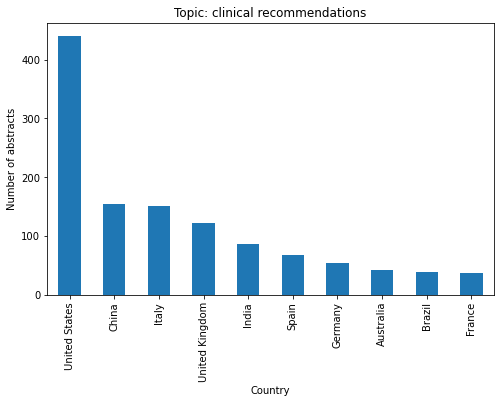

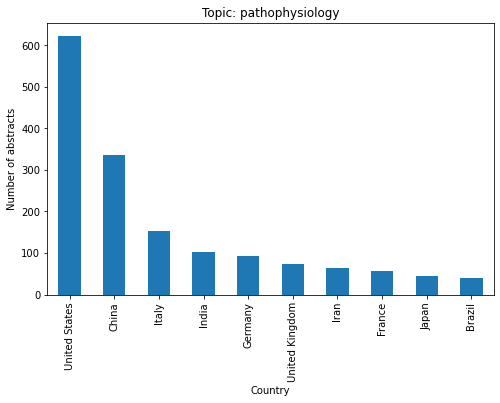

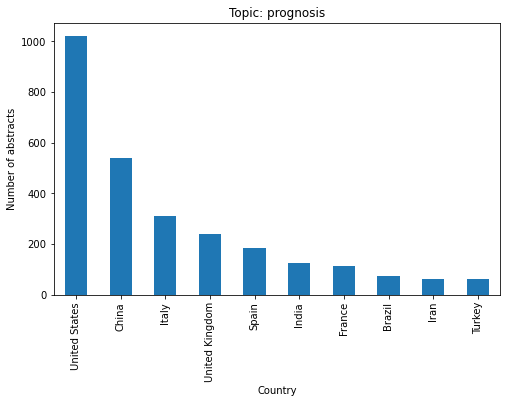

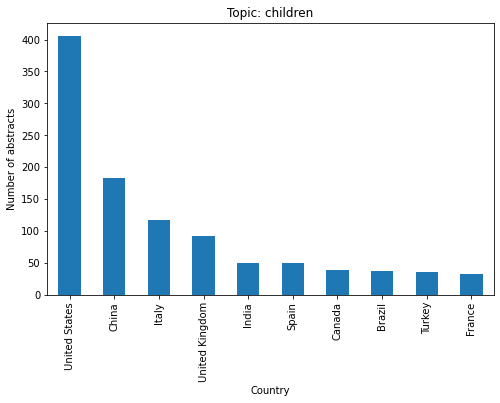

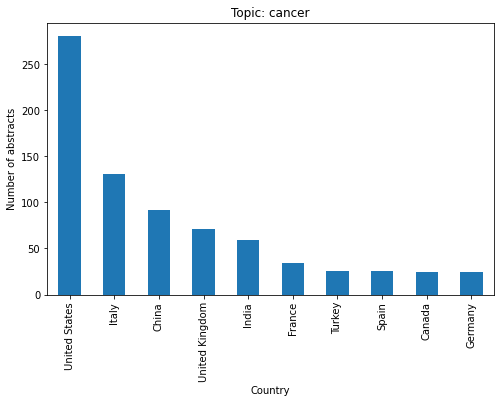

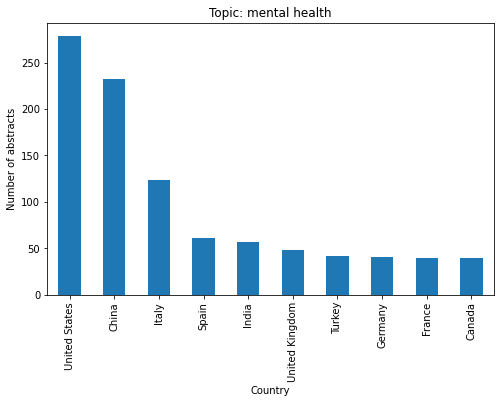

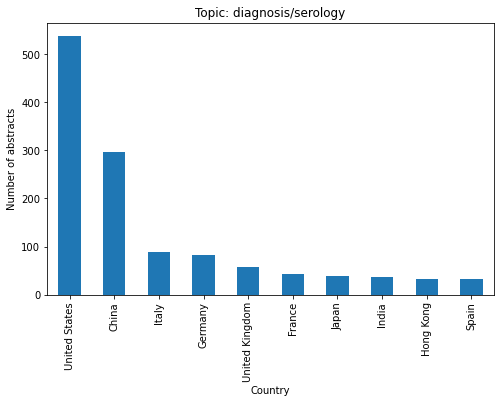

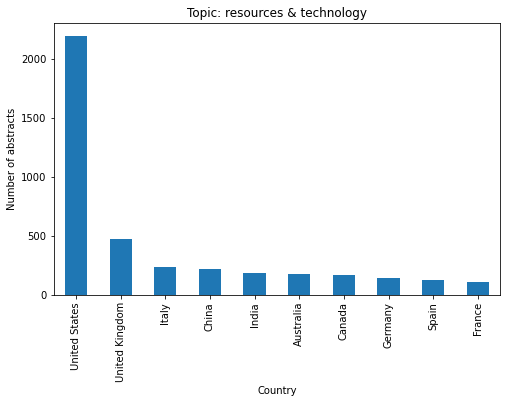

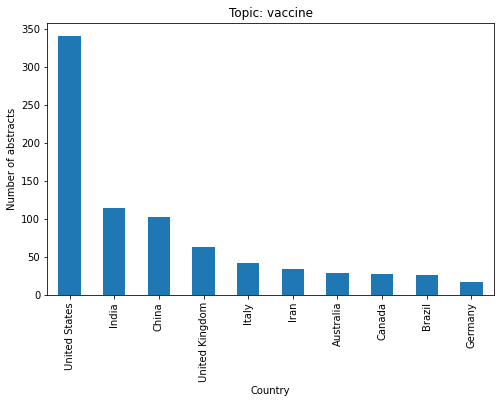

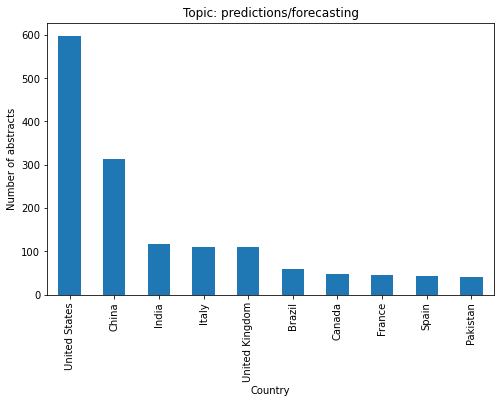

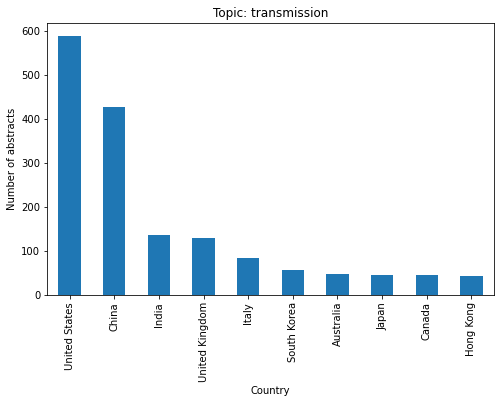

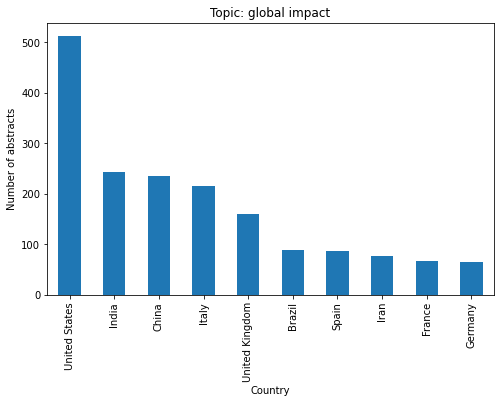

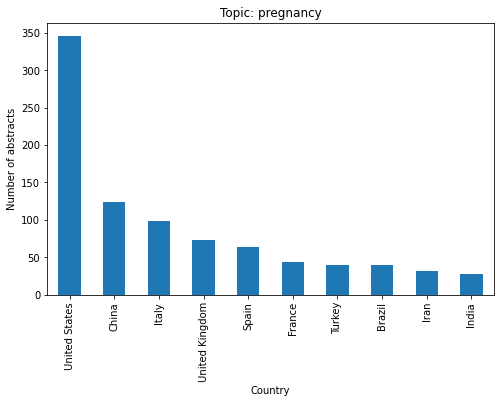

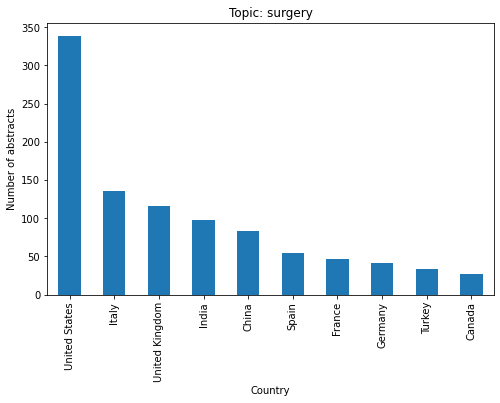

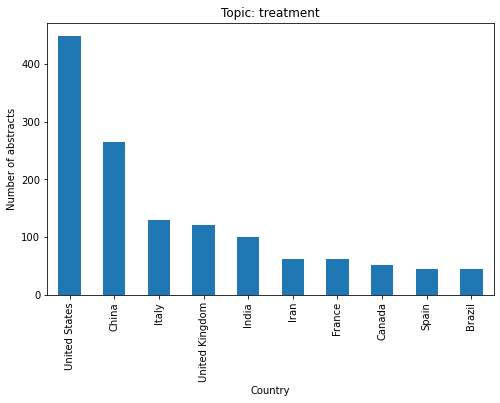

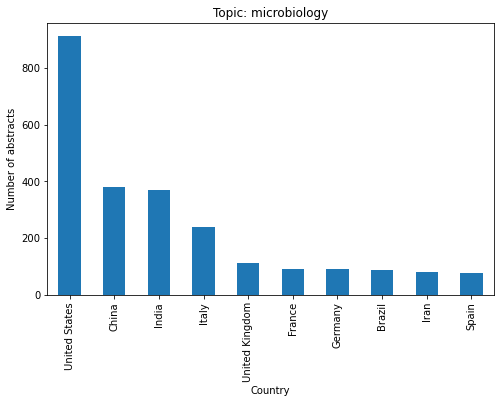

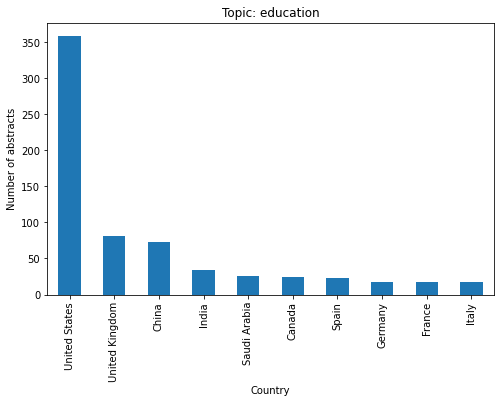

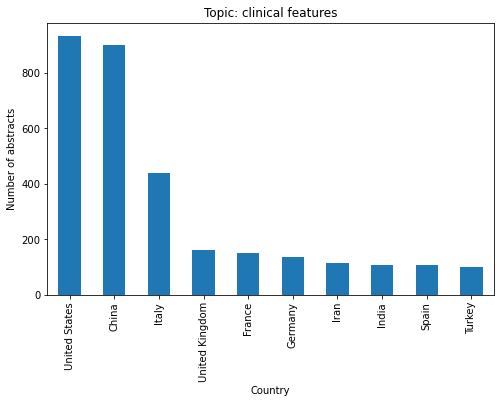

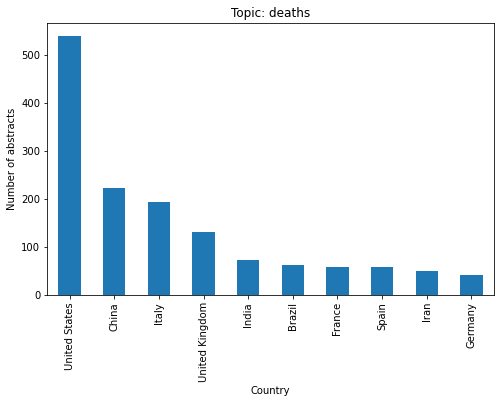

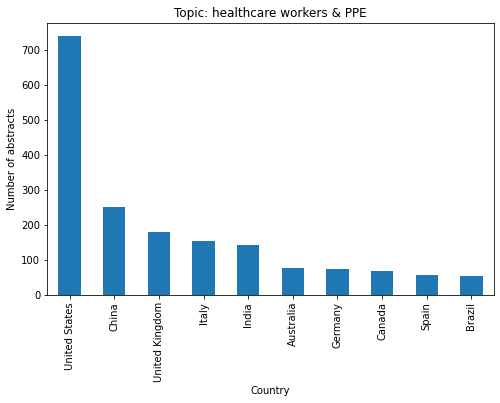

In [764]:
for i in range(len(topic_names)):
    plot_topic_countries(topic_pubcountry_df, i)

In [165]:
# Keep track of how many times these countries appear in top 10 for the topics
from collections import Counter

top_countries = []
for i in range(len(topic_names)):
    top_countries_l = topic_pubcountry_df.xs(topic_names[i]).sort_values(by='num_abstracts', ascending=False).iloc[:10,:].index
    for country in top_countries_l:
        top_countries.append(country)

top_countries_cts = dict(Counter(top_countries))

In [166]:
top_countries_l = list(set(top_countries))

In [167]:
lists = sorted(top_countries_cts.items(), key=lambda x: x[1], reverse=True)
top_countries_df = pd.DataFrame(lists)
top_countries_df.rename(columns={0: 'country', 1: 'frequency'}, inplace=True)
top_countries_df

,country,frequency
0,United States,20
1,China,20
2,Italy,20
3,United Kingdom,20
4,India,20
5,Spain,17
6,France,17
7,Germany,14
8,Brazil,12
9,Canada,11


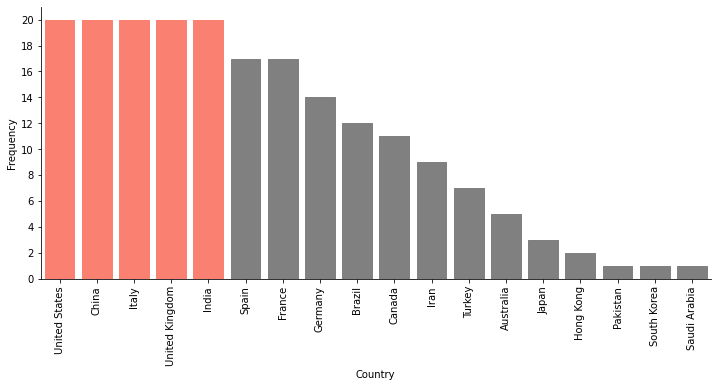

In [175]:
# Plot frequency of each country in 'top countries' list
plt.figure(figsize=(12,5))
ax = sns.barplot(x='country', y='frequency', data=top_countries_df)
ax.set_alpha(0.8)
# plt.title('Number of times country appears in top 10')
ax.set_xlabel('Country')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(0,21,2))
plt.xticks(rotation=90)

for bar in ax.patches:
    if bar.get_height() == 20:
        bar.set_color('salmon')    
    else:
        bar.set_color('grey')

plt.savefig('top10_countries.svg', bbox_inches='tight', dpi=100)

In [168]:
# Look at topics for each country
pubcountry_topic_df = pd.DataFrame(merged_df.groupby(['country', 'topic']).size())
pubcountry_topic_df.rename(columns={0: 'num_abstracts'}, inplace=True)
pubcountry_topic_df

num_abstracts
country     topic                                  
Afghanistan global impact                         2
Albania     mental health                         1
            microbiology                          1
Algeria     children                              2
            deaths                                1
...                                             ...
Zimbabwe    healthcare workers & PPE              3
            predictions/forecasting               1
            resources & technology                1
            surgery                               1
            transmission                          3

[1674 rows x 1 columns]

In [169]:
# List of country names in df
pubcountry_names = sorted(list(set([idx[0] for idx in pubcountry_topic_df.index])))

In [783]:
# Function to create dictionary where each key is a country and the value is a dictionary of topics w/ corresponding abstract counts
def country_topic_dict(df, i):
    country_name = pubcountry_names[i]
    country_df = pd.DataFrame(df.xs(country_name))
    country_topic_pair = list(zip(country_df.index, country_df.num_abstracts))
    country_dicts[country_name] = country_topic_pair

In [784]:
# Create dictionary of countries and topic counts
country_dicts = {}
for i in range(len(pubcountry_names)):
    country_topic_dict(pubcountry_topic_df, i)

country_dicts

{'Afghanistan': [('global impact', 2)],
 'Albania': [('mental health', 1), ('microbiology', 1)],
 'Algeria': [('children', 2),
  ('deaths', 1),
  ('global impact', 3),
  ('mental health', 1),
  ('microbiology', 9),
  ('pathophysiology', 1),
  ('predictions/forecasting', 4),
  ('prognosis', 3),
  ('surgery', 1)],
 'Andorra': [('clinical recommendations', 1)],
 'Argentina': [('cancer', 4),
  ('children', 1),
  ('clinical features', 6),
  ('clinical recommendations', 6),
  ('deaths', 7),
  ('diagnosis/serology', 5),
  ('global impact', 11),
  ('healthcare workers & PPE', 4),
  ('mental health', 10),
  ('microbiology', 13),
  ('pathophysiology', 9),
  ('predictions/forecasting', 6),
  ('pregnancy', 6),
  ('prognosis', 10),
  ('resources & technology', 8),
  ('surgery', 6),
  ('transmission', 1),
  ('treatment', 2),
  ('vaccine', 4)],
 'Aruba': [('treatment', 1)],
 'Australia': [('cancer', 13),
  ('children', 29),
  ('clinical features', 30),
  ('clinical recommendations', 42),
  ('deaths',

In [170]:
# Look at number of countries per topic
from collections import OrderedDict

topic_numcountries_dict = OrderedDict()
for i in range(len(topic_names)):
    num_countries = len(topic_pubcountry_df.xs(topic_names[i]).index)
    topic_numcountries_dict[topic_names[i]] = num_countries

topic_numcountries_dict = dict(topic_numcountries_dict)
topic_numcountries_dict

{'clinical recommendations': 81,
 'pathophysiology': 76,
 'prognosis': 93,
 'children': 78,
 'cancer': 67,
 'mental health': 80,
 'diagnosis/serology': 74,
 'resources & technology': 106,
 'vaccine': 73,
 'predictions/forecasting': 89,
 'transmission': 85,
 'global impact': 114,
 'pregnancy': 80,
 'surgery': 71,
 'treatment': 77,
 'microbiology': 98,
 'education': 72,
 'clinical features': 88,
 'deaths': 85,
 'healthcare workers & PPE': 87}

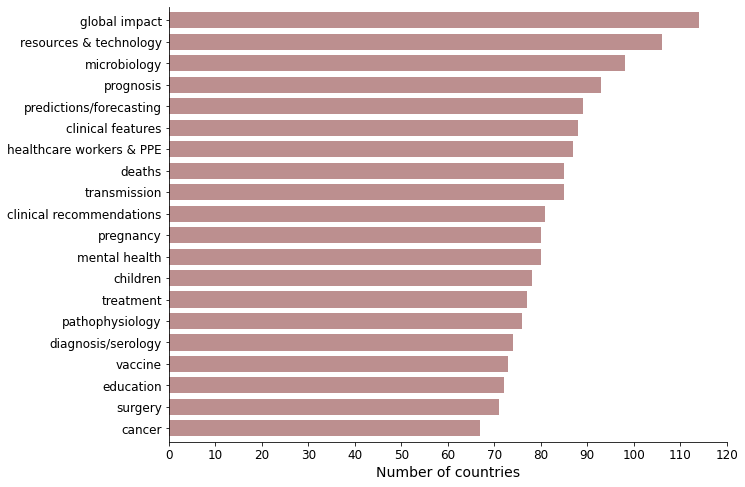

In [173]:
# Plot
lists = sorted(topic_numcountries_dict.items(), key=lambda x: x[1])
x, y = zip(*lists)
topic_num_countries_df = pd.DataFrame(y, x).reset_index()
topic_num_countries_df.rename(columns={'index': 'topic', 0: 'num_abstracts'}, inplace=True)
topic_num_countries_df = topic_num_countries_df.set_index('topic')

ax = topic_num_countries_df.plot(kind='barh', figsize=(10,8), legend=None, width=0.75, color='rosybrown')
ax.set_alpha(0.8)
ax.set_xlabel("Number of countries", fontsize=14);
ax.set_xticks(np.arange(0,130,10))
ax.set_ylabel('', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('topics_countries.svg', dpi=100, bbox_inches='tight');

In [162]:
# Number of unique countries
merged_df['country'].nunique()

160

Let's look at the topic distribution for the top countries.

In [442]:
# List of top countries
top_countries_l = list(set(top_countries))
top_countries_l

['Germany',
 'Saudi Arabia',
 'Australia',
 'Brazil',
 'India',
 'United Kingdom',
 'Iran',
 'Turkey',
 'United States',
 'Singapore',
 'China',
 'Canada',
 'Spain',
 'Japan',
 'Italy',
 'France']

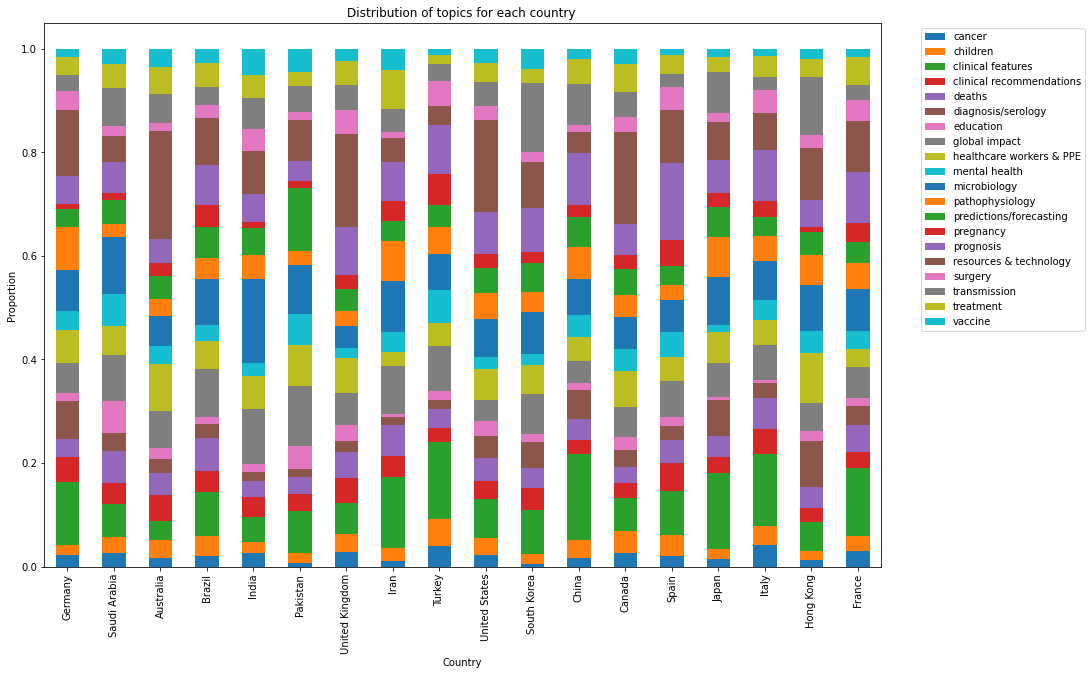

In [844]:
# Plot distribution of topics for each country
unstacked_tpc_df = topic_pubcountry_df.unstack(level=0)
unstacked_tpc_top_df = unstacked_tpc_df.loc[top_countries_l]
unstacked_tpc_top_df.div(unstacked_tpc_top_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Distribution of topics for each country ')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(labels=tm_idx, bbox_to_anchor=(1.25,1), loc="upper right");

Observations:
- 'Clinical features' & 'resources & technology' are popular topics throughout
- There are no dramatic differences between countries

**U.S.**

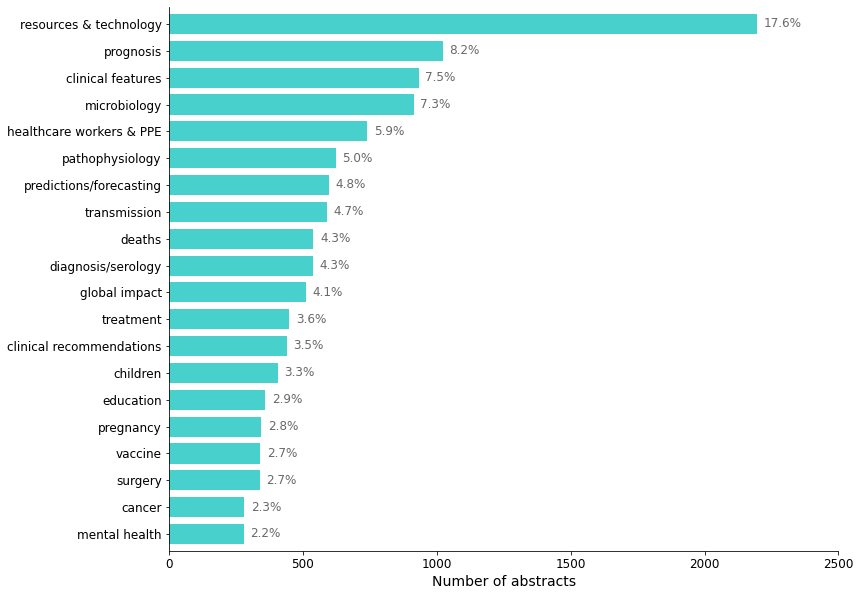

In [174]:
# Filter dataframe for U.S. entries only
us_pct_df = pubcountry_topic_df.xs('United States').sort_values(by='num_abstracts')

# Plot (code adapted from: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)
ax = us_pct_df.plot(kind='barh', color='mediumturquoise', figsize=(12,10), legend=None, width=0.75)
ax.set_alpha(0.8)
ax.set_xlabel("Number of abstracts", fontsize=14);
ax.set_xticks(np.arange(0,2600,500))
ax.set_ylabel("", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+25, i.get_y()+.25, \
            str(round((i.get_width()/total)*100, 1))+'%', fontsize=12, color='dimgrey')

plt.savefig('us_topics_abstracts.svg', dpi=100, bbox_inches='tight');

It might also be interesting to see the distribution of countries for each topic. I will create maps to visualize this.

In [262]:
import plotly.graph_objects as go
import plotly.express as px

In [258]:
# Function for plotting world map for topic
# Code adapted from: ***
# Color palette from coolors.co
def plot_topic_world_map(df, topic, i):
    topic_df = pd.DataFrame(df.xs(topic).sort_values(by='num_abstracts')).reset_index()
    
    fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = topic_df['pub_country'],
    z = topic_df['num_abstracts'],
    text = topic_df['pub_country'],
    colorscale = [
        [0, "rgb(119, 73, 54)"],
        [0.1, "rgb(119, 73, 54)"],

        [0.1, "rgb(138, 90, 68)"],
        [0.2, "rgb(138, 90, 68)"],

        [0.2, "rgb(157, 107, 83)"],
        [0.3, "rgb(157, 107, 83)"],

        [0.3, "rgb(176, 125, 98)"],
        [0.4, "rgb(176, 125, 98)"],

        [0.4, "rgb(195, 142, 112)"],
        [0.5, "rgb(195, 142, 112)"],

        [0.5, "rgb(205, 151, 119)"],
        [0.6, "rgb(205, 151, 119)"],

        [0.6, "rgb(214, 159, 126)"],
        [0.7, "rgb(214, 159, 126)"],

        [0.7, "rgb(222, 171, 144)"],
        [0.8, "rgb(222, 171, 144)"],

        [0.8, "rgb(230, 184, 162)"],
        [0.9, "rgb(230, 184, 162)"],

        [0.9, "rgb(237, 196, 179)"],
        [1.0, "rgb(237, 196, 179)"]
    ],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of abstracts'
    ))

    fig.update_layout(
        title_text="Number of COVID-19 Related Abstracts by Country for {} Topic".format(topic.upper()),
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ))
    
    fig.write_html('first_figure{}.html'.format(i), auto_open=True)

In [267]:
# Bubble map
def topic_bubble_map(df, topic, i):
    topic_df = pd.DataFrame(df.xs(topic).sort_values(by='num_abstracts')).reset_index()
    
    fig = px.scatter_geo(topic_df, locationmode="country names", locations="pub_country", size="num_abstracts",
                     hover_name="pub_country", color="pub_country",
                     projection="natural earth")

    fig.update_layout(
        title_text='Number of Abstracts for {} Topic by Country'.format(topic.upper()),
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )

    fig.write_html('topic_bubble_map{i}.html'.format(i), auto_open=True)

#### Plot states

In [178]:
# Read in latitude and longitude data
states_coords_df = pd.read_csv('/Users/sunnajo/Desktop/state_codes.csv')
states_coords_df.head()

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [179]:
# Merge coordinate data with original dataframe
states_merged_df = merged_df[merged_df['state'].notna()]
states_merged_df.head()

,pmid,abstract,month,country,state,topic,score
10,33152653,BACKGROUND: Information technologies have been...,7,United States,CT,resources & technology,0.044900
17,33152464,"Artepillin C (ARC), a prenylated derivative of...",11,United States,MD,cancer,0.093544
19,33152446,The SARS-CoV-2 virus has emerged as a striking...,11,United States,GA,transmission,0.054979
20,33152411,BACKGROUND: Serology tests for detecting the a...,11,United States,CA,diagnosis/serology,0.107226
24,33152279,The Preclinical Working Group of Accelerating ...,10,United States,MA,predictions/forecasting,0.119329


In [180]:
# Look at total abstracts by state
states_df = pd.DataFrame(states_merged_df.groupby(['state']).size()).reset_index()
states_df.rename(columns={0: 'num_abstracts'}, inplace=True)
states_df.head()

,state,num_abstracts
0,AK,18
1,AL,79
2,AR,48
3,AZ,111
4,CA,1001


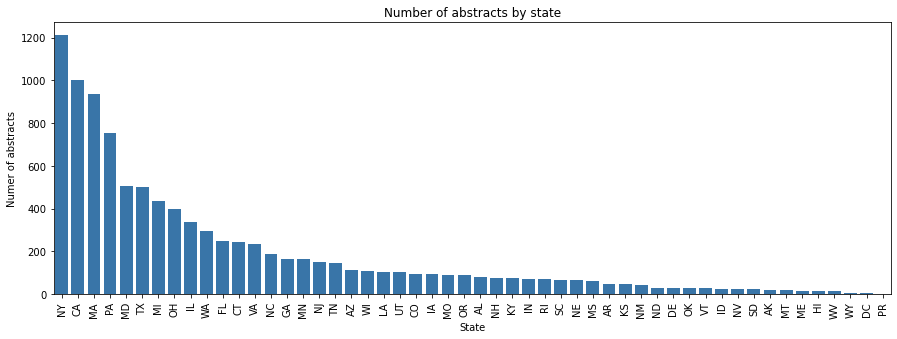

In [181]:
states_df_sorted = states_df.sort_values(by='num_abstracts', ascending=False)

# Plot
plt.figure(figsize=(15,5))
sns.barplot(x='state', y='num_abstracts', data=states_df_sorted, color=np.random.rand(3,))
plt.title('Number of abstracts by state')
plt.xlabel('State')
plt.ylabel('Numer of abstracts')
plt.xticks(rotation=90);

In [856]:
states_df['state'].nunique()

52

Every state is represented.

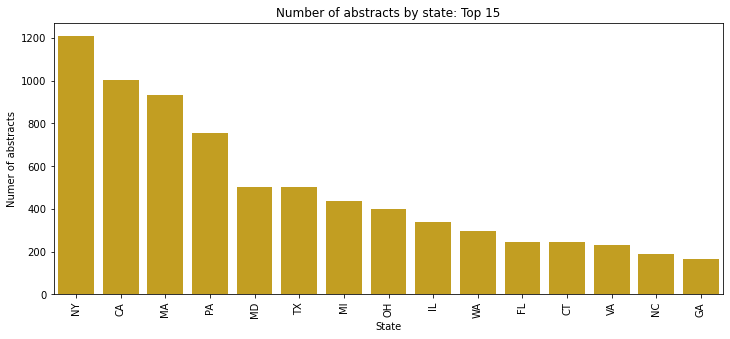

In [184]:
# Look at top 15 states
plt.figure(figsize=(12,5))
sns.barplot(x='state', y='num_abstracts', data=states_df_sorted.iloc[:15,:], color=np.random.rand(3,))
plt.title('Number of abstracts by state: Top 15')
plt.xlabel('State')
plt.ylabel('Numer of abstracts')
plt.xticks(rotation=90);

Observations:
- These states have many academic institutions and hospitals so this distribution makes sense
- New York and California have produced the most abstracts by far
- The CDC is located in Georgia

In [185]:
# Create states dataframe with coordinates for mapping
states_loc_df = states_merged_df.merge(states_coords_df, how='left', on='state')
states_loc_df.head()

,pmid,abstract,month,country,state,topic,score,latitude,longitude,name
0,33152653,BACKGROUND: Information technologies have been...,7,United States,CT,resources & technology,0.044900,41.603221,-73.087749,Connecticut
1,33152464,"Artepillin C (ARC), a prenylated derivative of...",11,United States,MD,cancer,0.093544,39.045755,-76.641271,Maryland
2,33152446,The SARS-CoV-2 virus has emerged as a striking...,11,United States,GA,transmission,0.054979,32.157435,-82.907123,Georgia
3,33152411,BACKGROUND: Serology tests for detecting the a...,11,United States,CA,diagnosis/serology,0.107226,36.778261,-119.417932,California
4,33152279,The Preclinical Working Group of Accelerating ...,10,United States,MA,predictions/forecasting,0.119329,42.407211,-71.382437,Massachusetts


In [186]:
# Create states dataframe with coordinates for mapping
states_df2 = states_df.merge(states_coords_df, how='left', on='state')
states_df2.sort_values(by='num_abstracts', ascending=False)

,state,num_abstracts,latitude,longitude,name
34,NY,1211,43.299428,-74.217933,New York
4,CA,1001,36.778261,-119.417932,California
19,MA,935,42.407211,-71.382437,Massachusetts
38,PA,755,41.203322,-77.194525,Pennsylvania
20,MD,504,39.045755,-76.641271,Maryland
44,TX,503,31.968599,-99.901813,Texas
22,MI,436,44.314844,-85.602364,Michigan
35,OH,400,40.417287,-82.907123,Ohio
14,IL,338,40.633125,-89.398528,Illinois
48,WA,297,47.751074,-120.740139,Washington


In [867]:
# Chloropleth map of U.S. states
import plotly.graph_objects as go

df = states_df2

fig = go.Figure(data=go.Choropleth(
    locations=df['state'],
    z = df['num_abstracts'],
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Number of abstracts",
))

fig.update_layout(
    title_text = 'Number of Abstracts by State',
    geo_scope='usa'
)

fig.write_html('states_abstracts.html', auto_open=True)

I now want to look at distribution of topics by state.

In [187]:
# Create dataframe of number of abstracts for each topic for each state
states_topic_df = pd.DataFrame(states_merged_df.groupby(['state', 'topic']).size())
states_topic_df.rename(columns={0: 'num_abstracts'}, inplace=True)
states_topic_df.head()

num_abstracts
state topic                                  
AK    clinical features                     2
      clinical recommendations              2
      diagnosis/serology                    1
      microbiology                          2
      predictions/forecasting               2

In [188]:
# Create dataframe of number of abstracts for each state for each topic
topic_states_df = pd.DataFrame(states_merged_df.groupby(['topic', 'state']).size())
topic_states_df.rename(columns={0: 'num_abstracts'}, inplace=True)
topic_states_df.head()

num_abstracts
topic  state               
cancer AL                 2
       AZ                 1
       CA                24
       CT                 7
       FL                 2

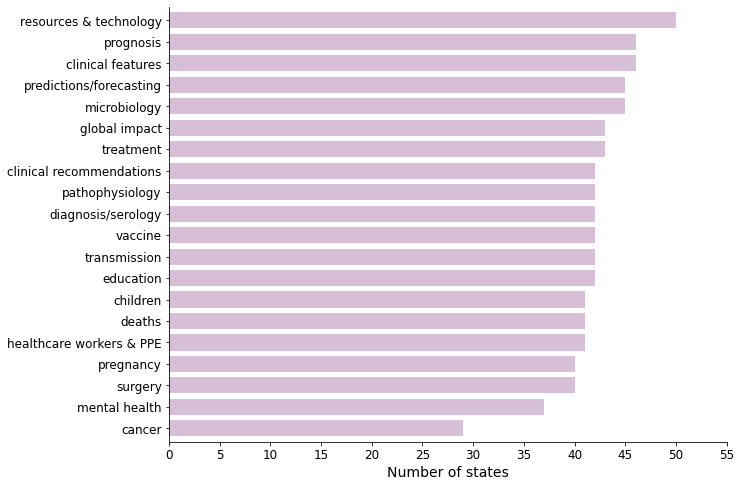

In [190]:
# Plot
topic_states_cts_df = pd.DataFrame(topic_states_cts.values(), topic_states_cts.keys())
ax = topic_states_cts_df.plot(kind='barh', figsize=(10,8), legend=None, width=0.75, color='thistle')
ax.set_alpha(0.8)
ax.set_xlabel("Number of states", fontsize=14);
ax.set_xticks(np.arange(0,60,5))
ax.set_ylabel('', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

plt.savefig('topics_num_states.svg', dpi=100, bbox_inches='tight');

In [201]:
# Look at unique states
states_df['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [864]:
# List of states
states_l = list(states_df['state'])
states_l[:5]

['AK', 'AL', 'AR', 'AZ', 'CA']

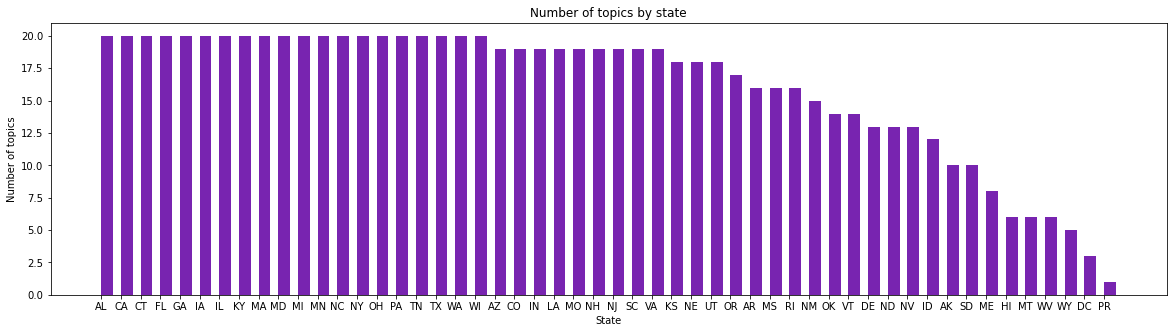

In [865]:
# Plot number of topics by state
states_topic_cts = {}
for state in states_l:
    states_topic_cts[state] = len(states_topic_df.xs(state))

states_topic_cts = {k: v for k, v in sorted(states_topic_cts.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(20,5))
plt.bar(states_topic_cts.keys(), states_topic_cts.values(), color=np.random.rand(3,), align='edge', width=0.6)
plt.title('Number of topics by state')
plt.xlabel('State')
plt.ylabel('Number of topics');

Many of the states cover all 15 topics.

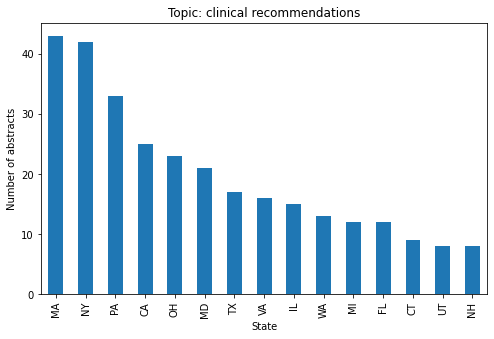

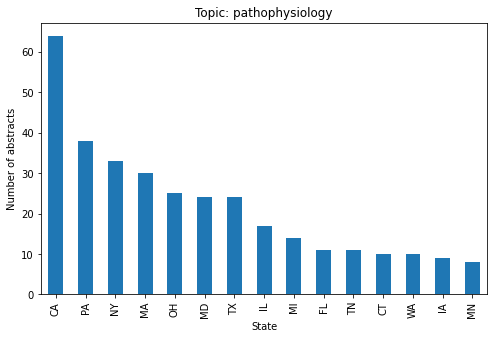

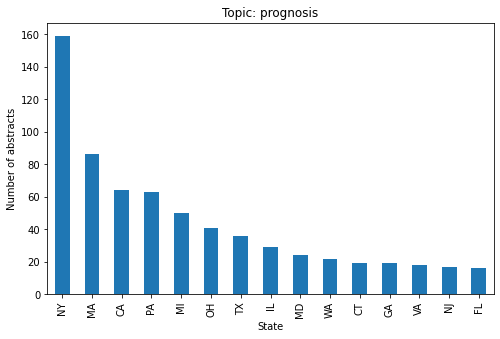

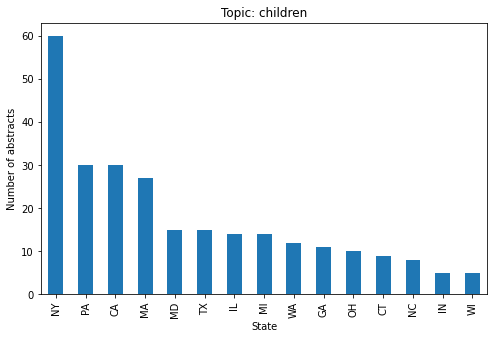

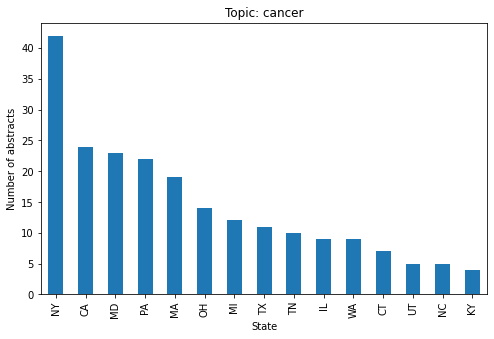

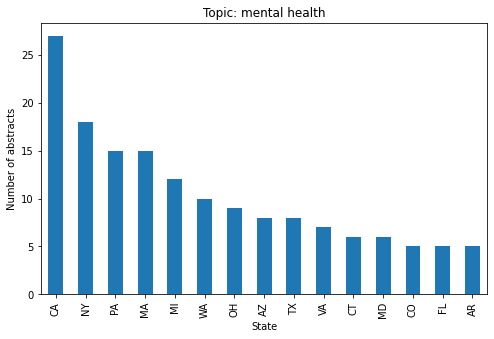

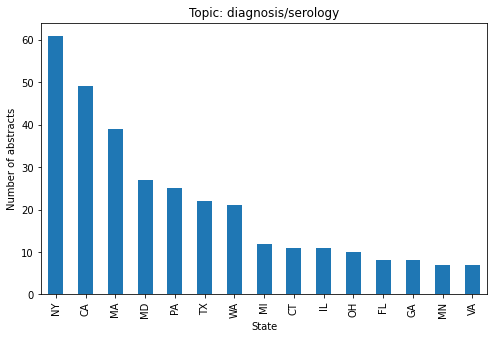

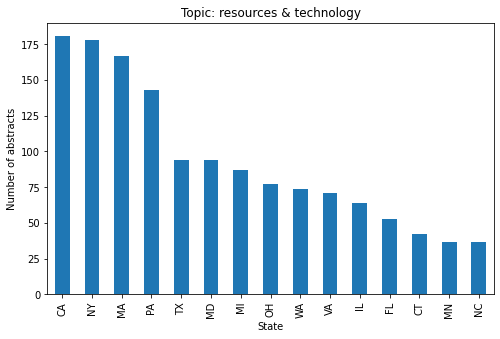

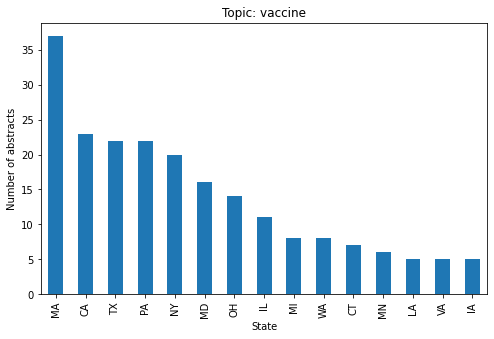

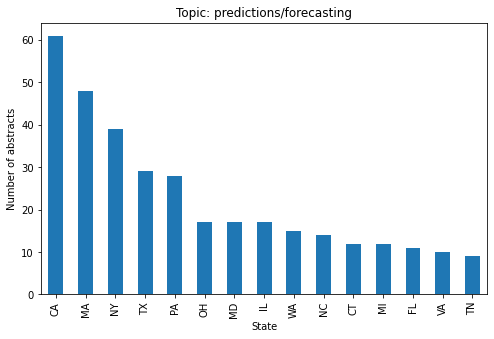

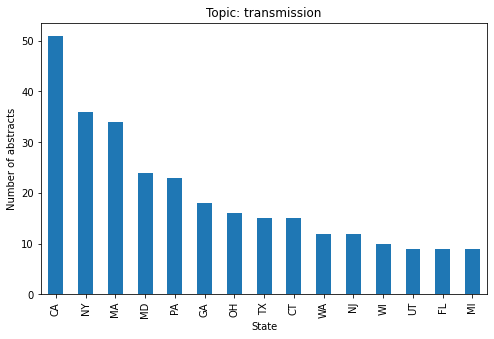

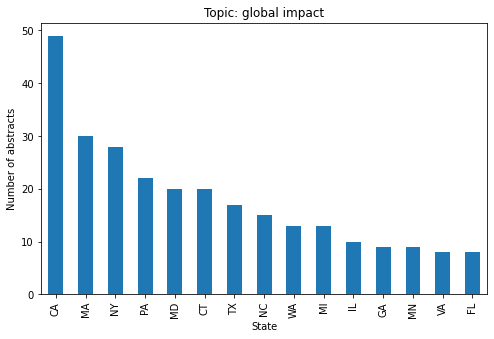

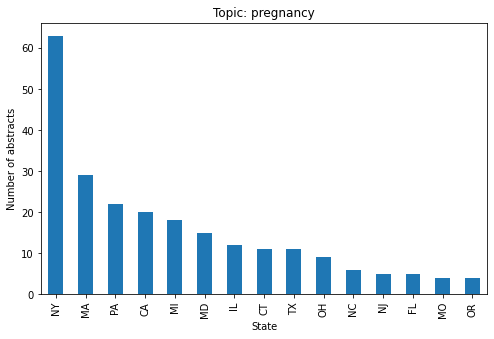

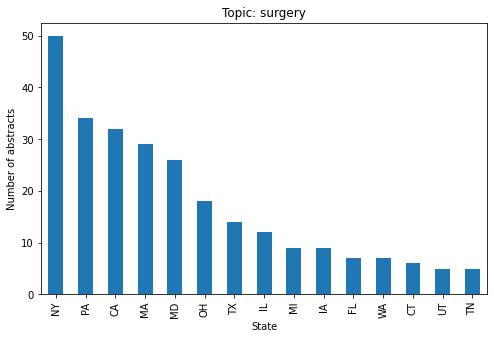

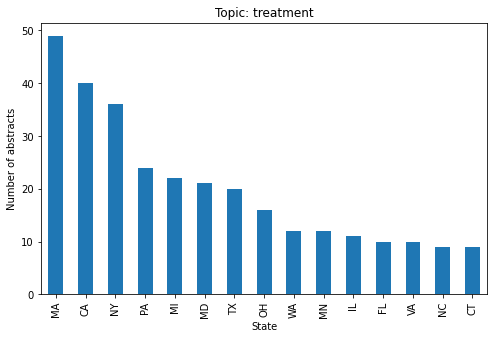

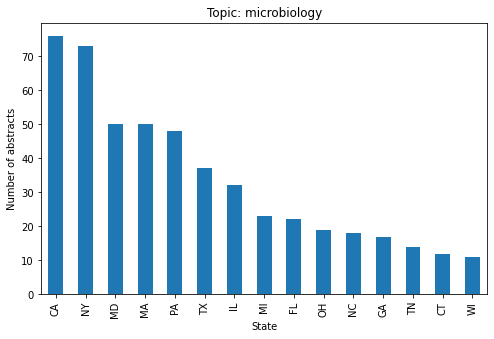

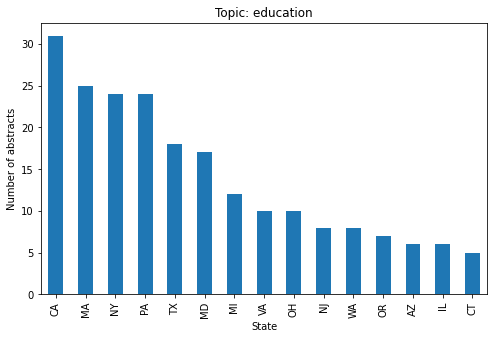

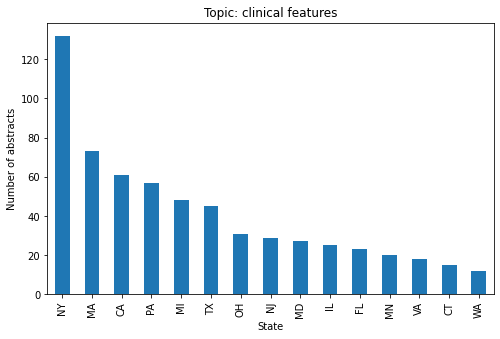

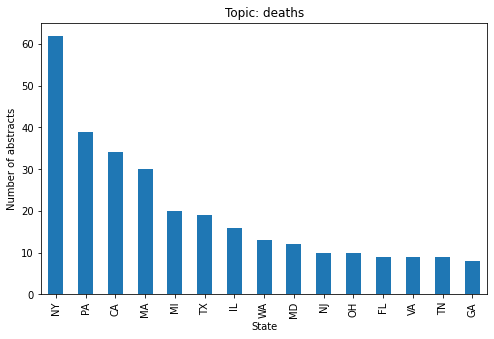

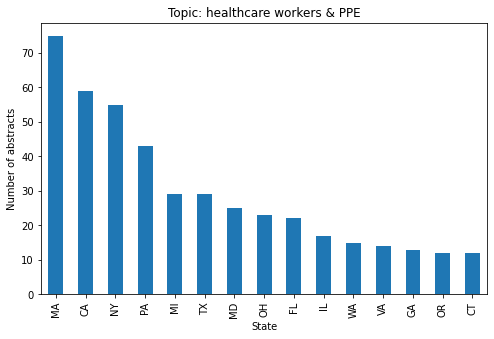

In [866]:
# For each topic, look at distribution of states (top 15)
def plot_topic_states(df, i):
    data = df.xs(topic_names[i]).sort_values(by='num_abstracts', ascending=False).iloc[:15,:]
    data.plot(kind='bar', figsize=(8,5), legend=None, title='Topic: {}'.format(topic_names[i]))
    plt.xlabel('State')
    plt.ylabel('Number of abstracts');
    
for i in range(len(topic_names)):
    plot_topic_states(topic_states_df, i)

In [191]:
# Keep track of how many times these states appear in top 10 for the topics
from collections import Counter

top_states = []
for i in range(len(topic_names)):
    top_states_l = topic_states_df.xs(topic_names[i]).sort_values(by='num_abstracts', ascending=False).iloc[:10,:].index
    for state in top_states_l:
        top_states.append(state)

top_states_cts = dict(Counter(top_states))

top_states_l = list(set(top_states))

lists = sorted(top_states_cts.items(), key=lambda x: x[1], reverse=True)
top_states_df = pd.DataFrame(lists)
top_states_df.rename(columns={0: 'state', 1: 'frequency'}, inplace=True)
top_states_df

,state,frequency
0,MA,20
1,NY,20
2,PA,20
3,CA,20
4,TX,20
5,MD,19
6,MI,17
7,OH,16
8,IL,14
9,WA,12


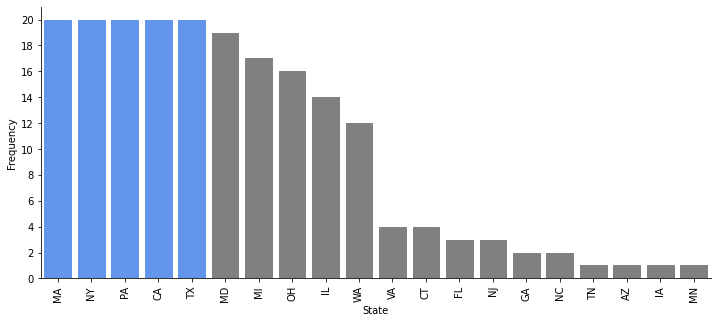

In [198]:
# Plot
plt.figure(figsize=(12,5))
ax = sns.barplot(x='state', y='frequency', data=top_states_df)
ax.set_alpha(0.8)
# plt.title('Number of times country appears in top 10')
ax.set_xlabel('State')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(0,21,2))
plt.xticks(rotation=90)

for bar in ax.patches:
    if bar.get_height() == 20:
        bar.set_color('cornflowerblue')    
    else:
        bar.set_color('grey');

plt.savefig('top10_states.svg', bbox_inches='tight', dpi=100)